<a href="https://colab.research.google.com/github/barrosm/BIMASTER_CODE_PUBLIC/blob/main/003_leitura_dados_diarios_cvm_parte_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados diários de fundos de investimentos

### Data: 13/02/2020

Mês início = 01/2017
Mês final = 02/2020 (ainda incompleto)

In [6]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
current_dir = os.getcwd()
current_dir

from time import perf_counter
import pickle

In [7]:
os.chdir('..')  # vai um nível para cima
current_dir = os.getcwd()
current_dir

path = current_dir + '/CVM/Diario/' #Linux
#path = current_dir + '\\CVM\\Diario\\'  #Windows
os.makedirs(path, exist_ok = 'TRUE')

In [8]:
# REMOTE PATH
remote_path = '/home/jupyter/Notebooks/monica/@Fund_Eval/CVM/Diario/'
os.makedirs(remote_path, exist_ok = 'TRUE')

In [9]:
path

'//CVM/Diario/'

In [10]:
url_address = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_'

In [11]:
ct = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712',
     '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812',
      '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912',
      '202001', '202002']

In [12]:
start_month = ct[0]
end_month = ct[-1]

In [13]:
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'

In [14]:
arq_names = [url_address + i + '.csv' for i in ct]

In [15]:
arq_names[-5:]

['http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201910.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201911.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201912.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202001.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202002.csv']

In [16]:
# Número de arquivos (meses) lidos 
len(arq_names)

38

In [17]:
# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ

In [18]:
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs
 **** a leitura dos dados demorou  289.36  segundos *****


In [19]:
#df.head(3)
#df.tail(3)

In [20]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,00.017.024/0001-53,2017-01-02,1082310.35,24.264751,1080998.58,0.0,0.0,1
1,00.017.024/0001-53,2017-01-03,1082843.72,24.274863,1081449.09,0.0,0.0,1
2,00.017.024/0001-53,2017-01-04,1083398.28,24.284681,1081886.49,0.0,0.0,1


## Salva dataframe com todos os dados diários em arquivo pkl

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11583037 entries, 0 to 11583036
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 707.0+ MB


In [22]:
time_start = perf_counter()

df.to_pickle(remote_path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  3.83  segundos *****


## Cálculo do Retorno diário

In [23]:
df["Return"] = df.groupby("CNPJ_FUNDO")["VL_QUOTA"].pct_change(1)*100.0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11583037 entries, 0 to 11583036
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   Return         float64
dtypes: float64(6), int64(1), object(2)
memory usage: 795.3+ MB


In [25]:
# se deu encrenca e o kernel morreu, reler df = pd.read_pickle(path+filename)

In [26]:
time_start = perf_counter()

df.to_pickle(remote_path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  3.83  segundos *****


In [27]:
df[['DT_COMPTC', 'VL_QUOTA', 'Return']][df['CNPJ_FUNDO']=='97.929.213/0001-34']

,DT_COMPTC,VL_QUOTA,Return
290109,2017-01-02,7.396478,NaN
290110,2017-01-03,7.403134,0.089997
290111,2017-01-04,7.384956,-0.245546
290112,2017-01-05,7.374894,-0.136255
290113,2017-01-06,7.376661,0.023969
...,...,...,...
11583032,2020-02-20,8.761928,-0.303703
11583033,2020-02-21,8.743980,-0.204833
11583034,2020-02-26,8.600821,-1.637233
11583035,2020-02-27,8.544137,-0.659056


In [28]:
# Example - return of a randomly chosen fund

#numpy.random.randint(low, high=None, size=None, dtype='l')
random_row = np.random.randint(0,len(df))
random_cnpj = df['CNPJ_FUNDO'].iloc[random_row,]
random_cnpj

'28.075.153/0001-17'

In [29]:
df_to_plot = df[['CNPJ_FUNDO','DT_COMPTC','Return']].copy()


In [30]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11583037 entries, 0 to 11583036
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CNPJ_FUNDO  object 
 1   DT_COMPTC   object 
 2   Return      float64
dtypes: float64(1), object(2)
memory usage: 265.1+ MB


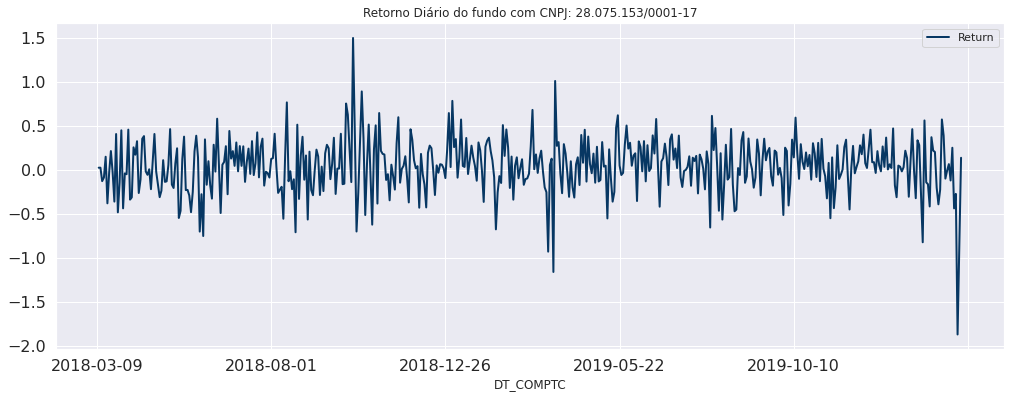

In [31]:
sns.set(rc={'figure.figsize':(17,6)})
df_to_plot[['DT_COMPTC','Return']][df_to_plot['CNPJ_FUNDO']==random_cnpj].set_index('DT_COMPTC').plot(title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                                                                     fontsize = 16, linewidth = 2.0, color = '#073763');

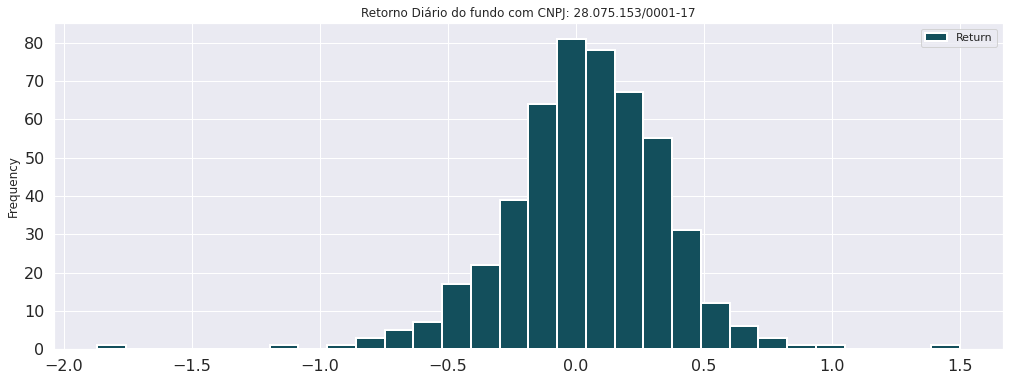

In [32]:
sns.set(rc={'figure.figsize':(17,6)})
df[['Return']][df['CNPJ_FUNDO']==random_cnpj].plot.hist(bins = 30, title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                        fontsize = 16, linewidth = 2.0, color = '#134f5c')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11583037 entries, 0 to 11583036
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   Return         float64
dtypes: float64(6), int64(1), object(2)
memory usage: 795.3+ MB


In [34]:
# Show days where return below 1% for randomly selected fund

df[['DT_COMPTC','Return']][(df['CNPJ_FUNDO']==random_cnpj )& (df['Return'] < -1)].set_index('DT_COMPTC')

,Return
DT_COMPTC,
2019-03-27,-1.160428
2020-02-26,-1.870741


## Salva dataframe incluindo retornos diários em arquivo csv

In [36]:
time_start = perf_counter()
df.to_csv('df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  106.69  segundos *****


In [42]:
!ls -Salh      # Cria arquivo csv de 1.2G

total 1.2G
-rw-r--r--   1 root root 1.2G May 15 23:14 df_diario_201701_202002.csv
drwxr-xr-x   1 root root 4.0K May 15 23:12 .
drwxr-xr-x   1 root root 4.0K May 15 23:12 ..
drwxr-xr-x   1 root root 4.0K May  6 13:31 bin
drwxr-xr-x   2 root root 4.0K Apr 24  2018 boot
drwxr-xr-x   1 root root 4.0K May  6 13:44 content
drwxr-xr-x   3 root root 4.0K May 15 23:03 CVM
drwxr-xr-x   1 root root 4.0K May 13 13:53 datalab
drwxr-xr-x   1 root root 4.0K May 15 23:01 etc
drwxr-xr-x   1 root root 4.0K May 15 23:03 home
drwxr-xr-x   1 root root 4.0K May  6 13:33 lib
drwxr-xr-x   2 root root 4.0K May  6 13:22 lib32
drwxr-xr-x   1 root root 4.0K May  6 13:22 lib64
drwxr-xr-x   2 root root 4.0K Sep 21  2020 media
drwxr-xr-x   2 root root 4.0K Sep 21  2020 mnt
drwxr-xr-x   1 root root 4.0K May  6 13:38 opt
drwx------   1 root root 4.0K May 15 23:01 root
drwxr-xr-x   1 root root 4.0K May  6 13:25 run
drwxr-xr-x   1 root root 4.0K May  6 13:31 sbin
drwxr-xr-x   2 root root 4.0K Sep 21  2020 srv
drwxr-xr-x